### DAVID data analysis

1    34186
Name: SENSOR_ID, dtype: int64

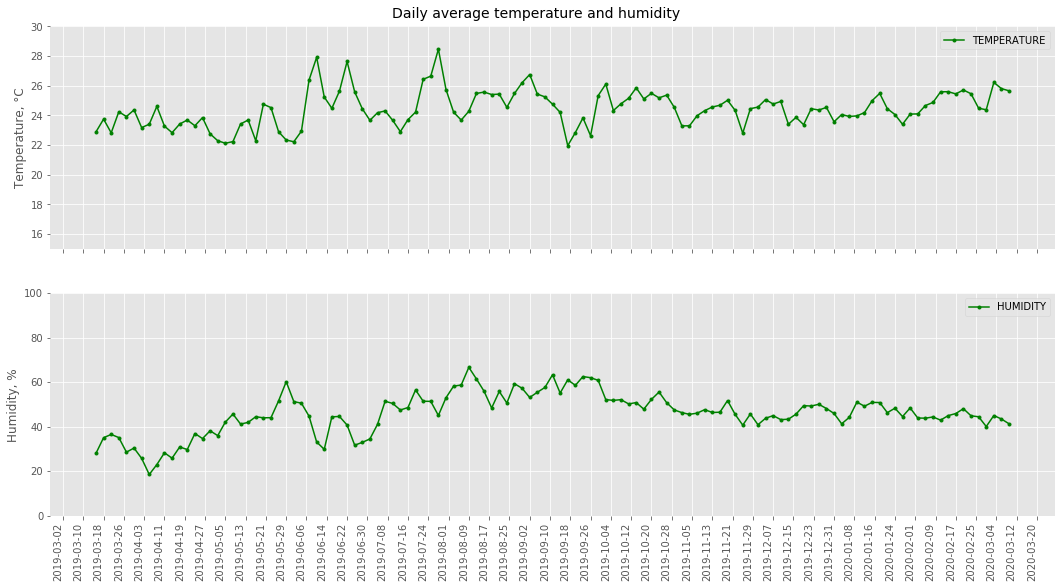

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join, normpath
import sqlite3
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

downloads = 'C:/Users/balob/Downloads'
plt.style.use('ggplot')

db_file = 'david_db.sqlite'
conn = sqlite3.connect(join(downloads, db_file))
df = pd.read_sql_query('SELECT * FROM CLIMATE_SENSORS WHERE sensor_id=1', conn, parse_dates={'REP_DATE': '%Y-%m-%d %H:%M:%S'}) # , parse_dates={'REP_DATE': '%Y/%m/%d %h:%m:%s'}
conn.close()

display(df.SENSOR_ID.value_counts())

df[['TEMPERATURE','HUMIDITY']] = df[['TEMPERATURE','HUMIDITY']].astype('float')
df.set_index('REP_DATE', inplace=True)
df = df.groupby(df.index.round('3D'))['TEMPERATURE','HUMIDITY'].mean()
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 9), sharex=True)
plt.suptitle('Daily average temperature and humidity', x=0.5, y=0.91, fontsize=14) # plt.title('Scores by group and gender')

axes[0].set_ylim([15,30])
axes[0].set_ylabel('Temperature, °C')
axes[1].set_ylim([0,100])
axes[1].set_ylabel('Humidity, %')
axes[0].plot(df.TEMPERATURE, linestyle='-',color='g', marker='.',label='TEMPERATURE')    
axes[1].plot(df.HUMIDITY, linestyle='-',color='g', marker='.',label='HUMIDITY')
plt.xticks(rotation=90, ha="right")
myFmt = mdates.DateFormatter('%Y-%m-%d')
axes[1].xaxis.set_major_formatter(myFmt)
axes[1].xaxis.set_major_locator(ticker.MultipleLocator(8))
for i in range(0,2):
    axes[i].legend(loc='best')
    for spine in axes[i].spines.values():
        spine.set_visible(False)
plt.show()

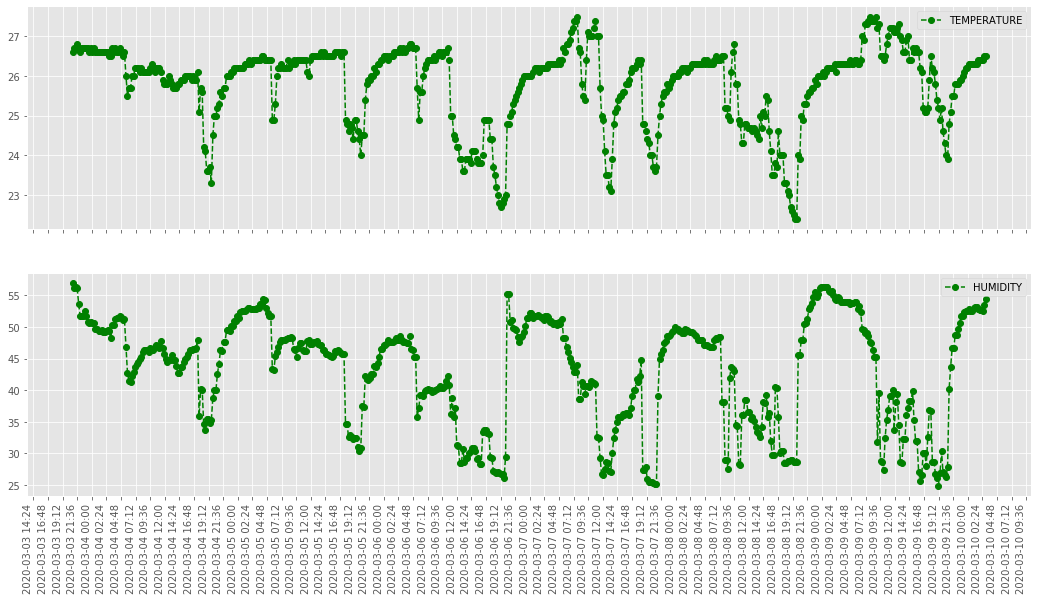

In [5]:
db_file = 'david_db.sqlite'
conn = sqlite3.connect(join(downloads, db_file))
df = pd.read_sql_query('SELECT * FROM CLIMATE_SENSORS WHERE sensor_id=1', conn, parse_dates={'REP_DATE': '%Y-%m-%d %H:%M:%S'}) # , parse_dates={'REP_DATE': '%Y/%m/%d %h:%m:%s'}
conn.close()

df[['TEMPERATURE','HUMIDITY']] = df[['TEMPERATURE','HUMIDITY']].astype('float')
df.set_index('REP_DATE', inplace=True)

df = df[-600:]
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 9), sharex=True)
axes[0].plot(df.TEMPERATURE, linestyle='--',color='g',marker='o', label='TEMPERATURE')
axes[1].plot(df.HUMIDITY, linestyle='--',color='g',marker='o', label='HUMIDITY')
plt.xticks(rotation=90, ha="right")
myFmt = mdates.DateFormatter('%Y-%m-%d %H:%M')
axes[1].xaxis.set_major_formatter(myFmt)
axes[0].legend(loc='best')
axes[1].legend(loc='best')
axes[1].xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.show()

In [9]:
df.SENSOR_ID.value_counts()

AttributeError: 'DataFrame' object has no attribute 'SENSOR_ID'